In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
companies_df = pd.read_csv('data/1000_Companies.csv')

In [5]:
# output of the first 5 records 
companies_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
companies_df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [9]:
#  1000 rows , 5 columns
companies_df.shape

(1000, 5)

In [11]:
# With the exception of State(categorical variable) the remaining 
# features are numerical(floats)
companies_df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [13]:
#  X as the R&D variable and Y the profit. 

#Spend= companies_df['R&D Spend']
#Profit= companies_df['Profit']

r_and_d_spend = companies_df.iloc[:,0]
profit = companies_df.iloc[:,-1]


X = r_and_d_spend.values
y = profit.values

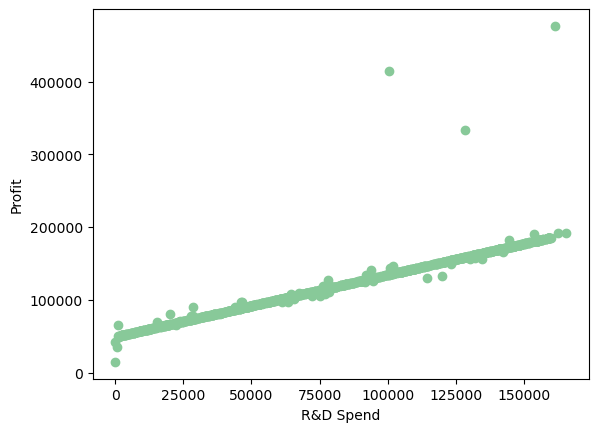

In [15]:
#Scatter plot between the variables R&D and Profit showing the relationship 

plt.scatter(X,y, color = '#88c999')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

In [17]:
# Correlation value between R&D and Profit.
#  strong positive correlation(0.95) with r&d spend and profit. 
#   As spend increases, profit also increase

X = r_and_d_spend.values
y = profit.values
r =np.corrcoef(X,y)[0,1]
print(r)

0.9452452888937631


In [19]:
#mean and std

#$48,401 is the value that represents the expected profit when the spend is 0 . 
# Without R&D spend, the profit would be $48,401.9. 

mean_of_X = np.mean(X)
mean_of_y = np.mean(y)

std_of_X = np.std(X)
std_of_y = np.std(y)

b = r * (std_of_y/std_of_X)
a= mean_of_y - (b* mean_of_X)
print(b)
#a

#y = 48401.9+0.87(X)

0.8711301627727818


In [21]:
# need to review feature names
companies_df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [23]:
# need to encode the state column as it is categorical to include this in the  regression analysis, it needs to be converted to numeric
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoded_states= encoder.fit_transform(companies_df[["State"]])
companies_df['states_encoded'] = encoded_states

In [25]:
new_companies = companies_df.drop('State', axis = 1) #drop the states column as it is not needed

Text(0.5, 1.0, 'Correlation Matrix')

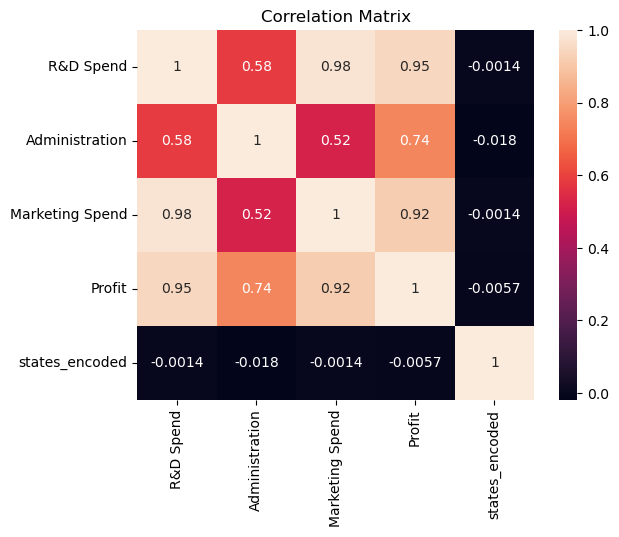

In [27]:
# Visualize the correlation between all the attributes:
sns.heatmap(new_companies.corr(), annot=True)
plt.title('Correlation Matrix')

In [33]:
X = companies_df[['R&D Spend','Administration','Marketing Spend', 'states_encoded']]
y = companies_df['Profit']

In [35]:
#Create training data and testing data:
from sklearn.model_selection import train_test_split

In [37]:
# 20% of the data will be used for testing while 80% will be used for training 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2,random_state=0)

In [39]:
#Predict your profit using: sklearn.linear_model:

from sklearn.linear_model import LinearRegression
model=LinearRegression() # create the model  
model.fit(X_train,y_train) #fit the model to the training data. The model will learn the relationship between the independent and dependent variables using r 


LinearRegression()

In [41]:
y_pred=model.predict(X_test)
y_pred#predicted values 

array([ 89624.88499983,  88261.44060358,  94728.57723845, 176034.49990954,
        83234.84214495, 110393.04058199, 131831.18880607,  91307.52461765,
       164414.26754671,  53585.35570743,  66786.11950078, 150921.89704628,
       126746.78121459,  59174.341725  , 177341.80724482,  75139.98127599,
       118605.9491146 , 164403.24374731, 171336.34862472, 181885.06087421,
       118762.26624783,  85504.5201526 , 181345.84072646,  83979.76201107,
       104839.00200137, 101067.00608604,  53722.31401539,  56706.45386115,
        68732.18107141, 209811.34272095, 121136.34391499, 111557.54775873,
       101309.70393418, 138315.39958078,  63806.10546728, 108690.79660343,
       185830.38310114, 171796.58186122, 174997.97325294, 118029.33822338,
        96553.52264734, 165281.03076793, 107557.31012676,  50557.29080259,
       116871.82636073,  58469.02312669, 158771.35516035,  78902.17488961,
       160082.45834529, 131494.74562654, 185233.67354482, 174962.79318566,
        93579.64586335,  

In [43]:
print(model.coef_) # r scores for each independent variable 

[ 5.27572958e-01  8.44490415e-01  1.06639226e-01 -3.54869857e+02]


In [45]:
 # predicted value of profit when 'R&D Spend','Administration','Marketing Spend', 'states_encoded' is 0
print(model.intercept_)

-51144.72642572195


In [ ]:
#putting in all together
# Profit = (R&d Spend * 0.527) + (Administration * 0.844) + (Marketing Spend * 0.106) + (State_Code * -0.0355) - 51144.72

**Interpretation**

* R&D Spend: For each increase in R&D spending, the profit is expected to increase by $0.53 

* Administration: For each  increase in Administration spending, the profit is expected to increase by $0.84

* Marketing Spend: For each  increase in Marketing spending, profit is expected to increase by $0.11

* State_Code: r= -0.0355 suggests that being in certain states may be associated with lower profits 

* The predicted value of Profit is -51144.73 represents when all the independent variables (X) are 0